In [20]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

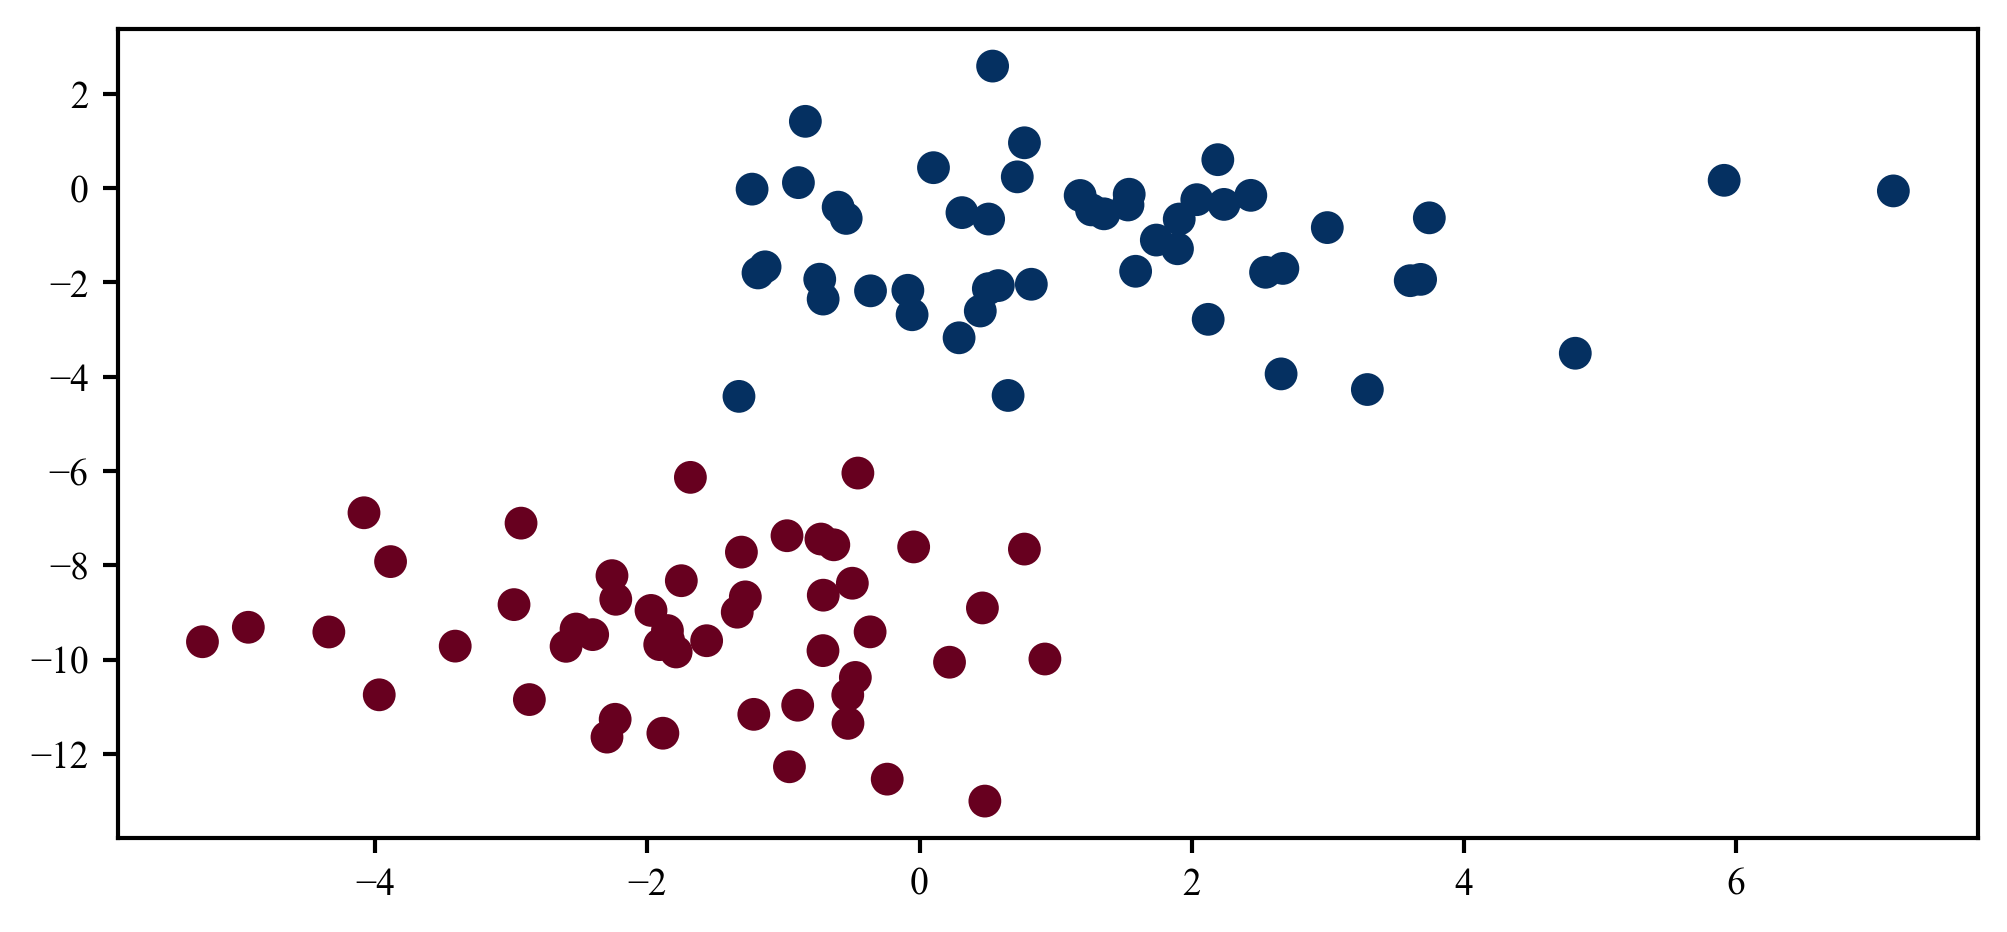

In [2]:
# 高斯朴素贝叶斯
from sklearn.datasets import make_blobs
from my_style import set_journal_style
set_journal_style()
# 数据导入
X,y = make_blobs(100,2,centers=2,random_state=2,cluster_std=1.5)
fig,ax = plt.subplots(figure=(12,5))
ax.scatter(X[:,0],X[:,1],c=y,s=50,cmap='RdBu');

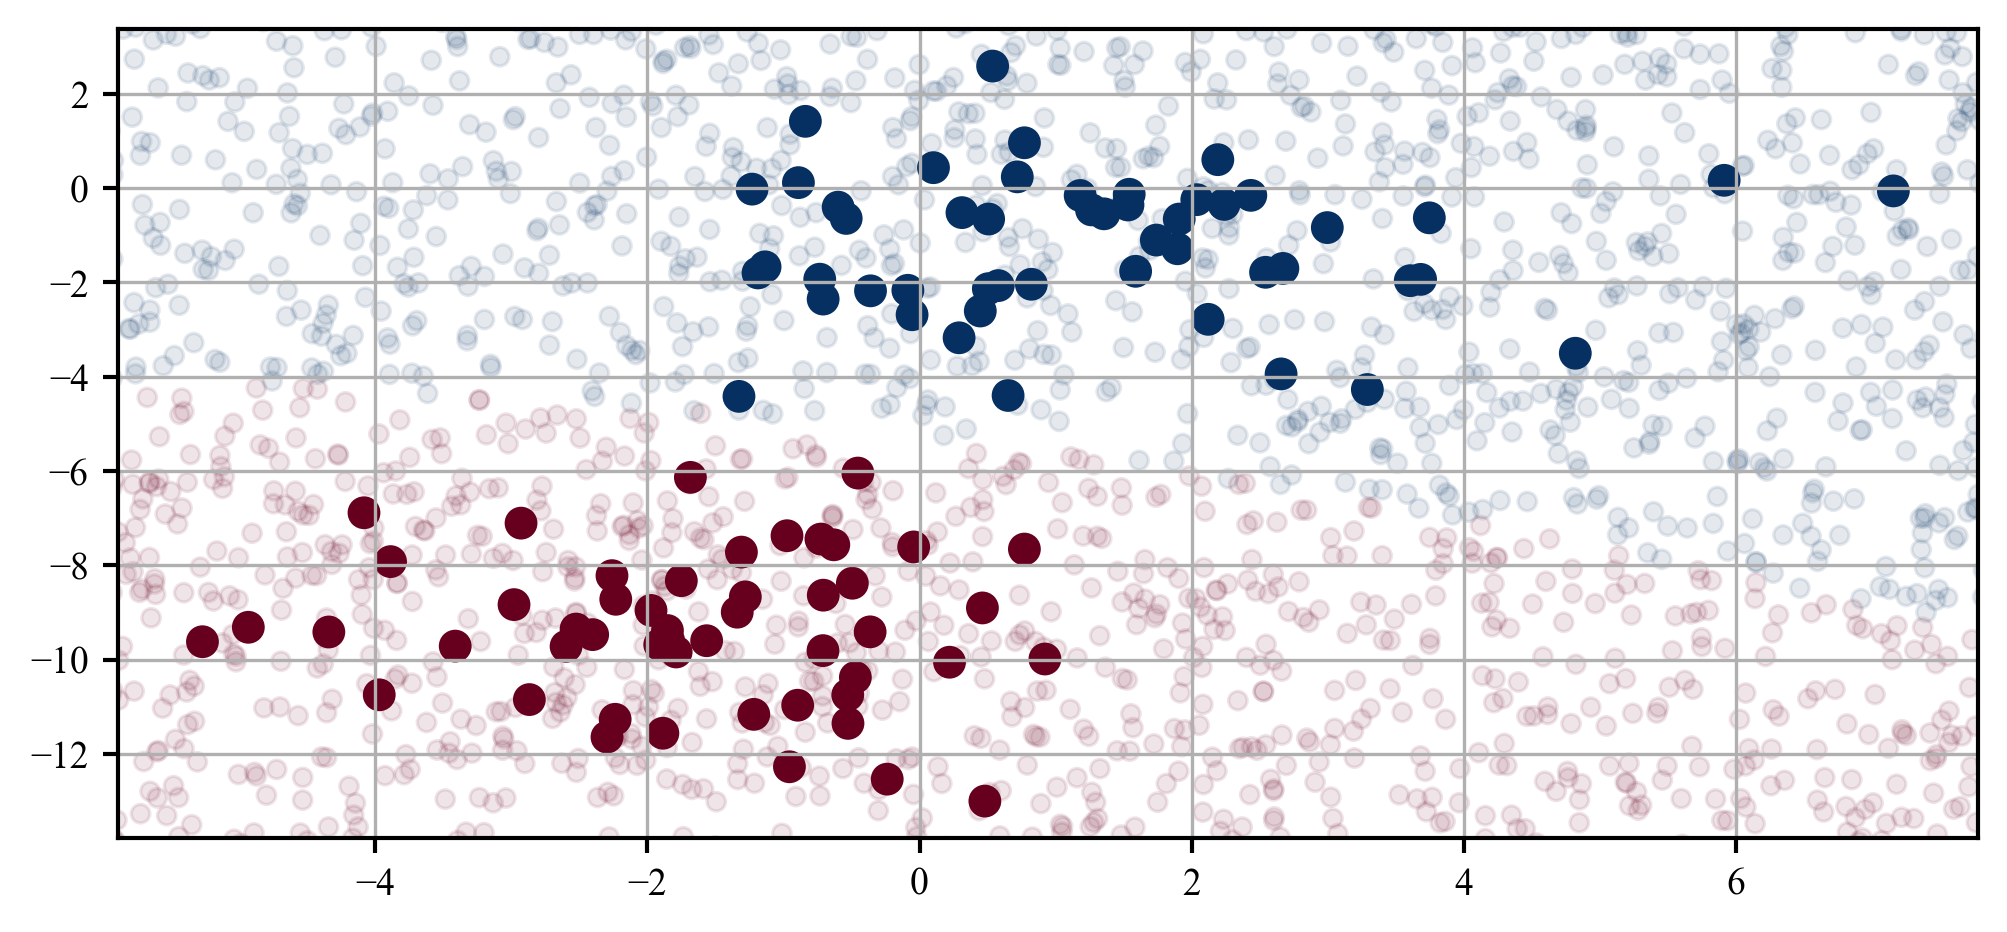

In [3]:
# 生成模型似然估计
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X,y);
# 预测
rng = np.random.RandomState(0)
Xnew = [-6,-14]+[14,18]*rng.rand(2000,2)
ynew = model.predict(Xnew)
# 可视化
fig,ax = plt.subplots(figure=(8,5))
ax.scatter(X[:,0],X[:,1],c=y,s=50,cmap='RdBu');
lim = ax.axis()
ax.scatter(Xnew[:,0],Xnew[:,1],c=ynew,s=20,cmap='RdBu',alpha=0.1);
ax.axis(lim)
ax.grid()

In [4]:
# 计算每个样本的概率
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

In [5]:
# 多项式朴素贝叶斯
from sklearn.datasets import fetch_20newsgroups
path = 'D:/x/20newsbydate'
categories = ['talk.religion.misc','soc.religion.christian','sci.space','comp.graphics']
train = fetch_20newsgroups(
    data_home=path,
    subset='train',
    categories=categories
)
test = fetch_20newsgroups(
    subset='test',
    categories=categories
)

In [26]:
# 向量化转化+多项式朴素贝叶斯
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
model = make_pipeline(TfidfVectorizer(),MultinomialNB())
# 拟合
model.fit(train.data,train.target)
labels = model.predict(test.data)
# 评估
model.score(train.data,train.target)

0.8959591267998143

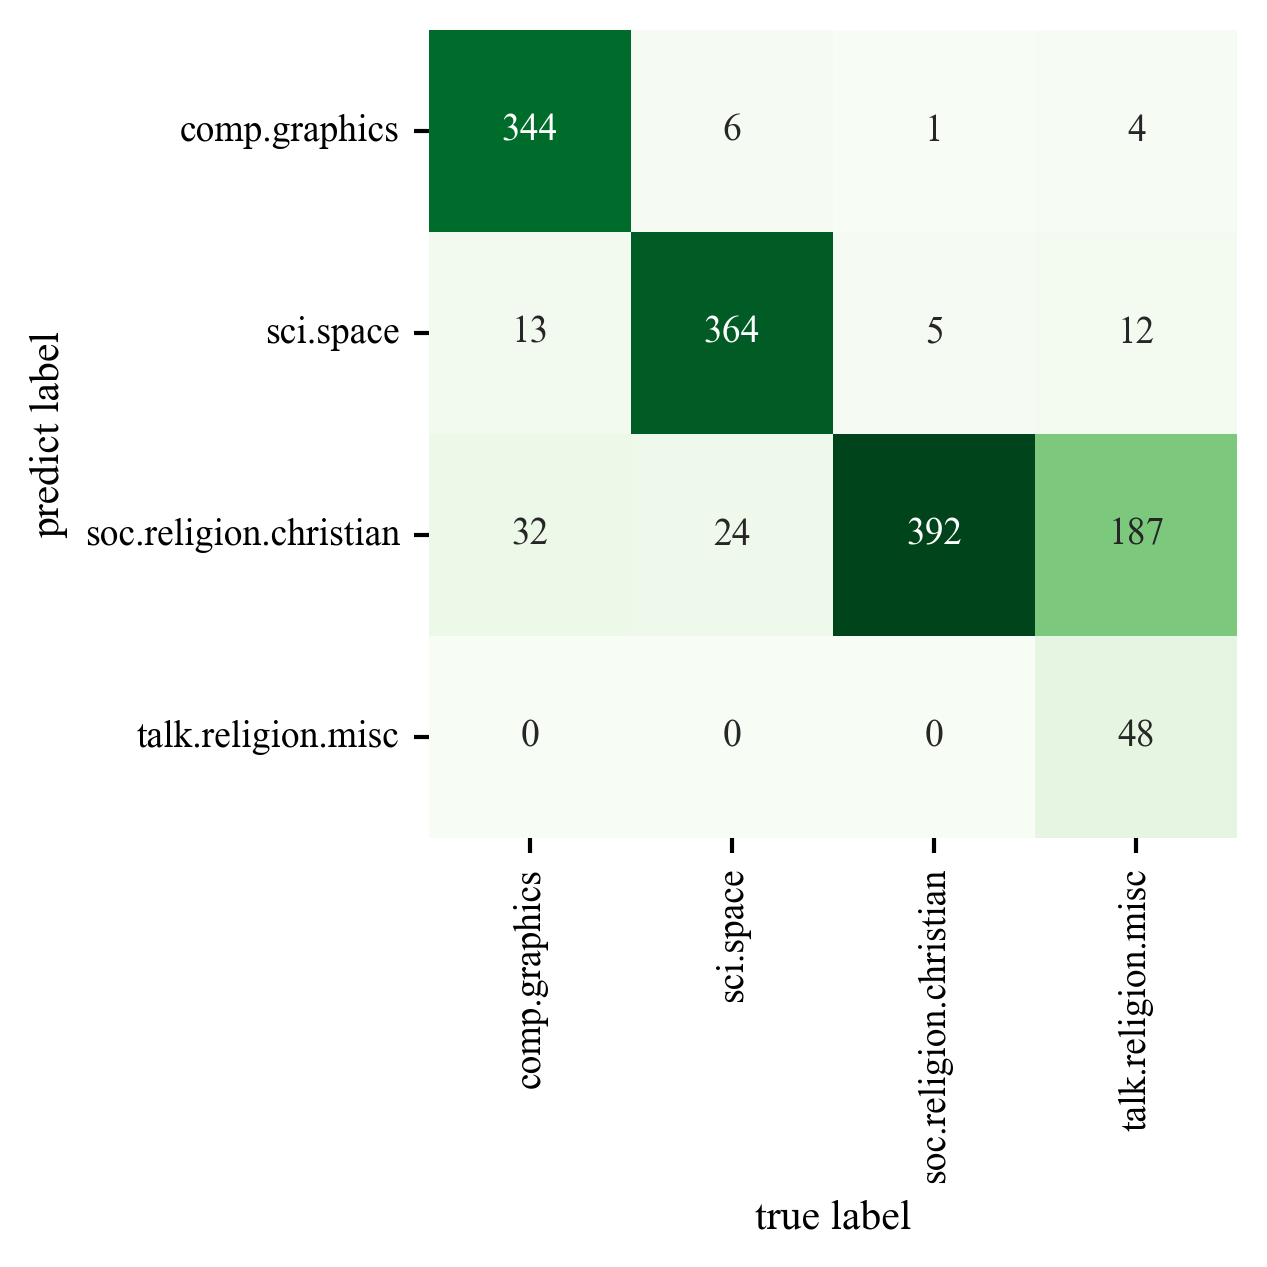

In [34]:
# 可视化
from sklearn.metrics import confusion_matrix
from my_style import set_journal_style
from matplotlib import colormaps
set_journal_style()
mat = confusion_matrix(test.target,labels)
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False,cmap=colormaps['Greens'],
            xticklabels=train.target_names,yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predict label');

In [ ]:
# 定义分类函数
def predict_category(s,train=train,model=model):
    pred =model.predict([s])
    return train.target_names[pred[0]]
predict_category('sending a payload to the ISS')

'sci.space'